In [11]:
ls -l /global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v0.6/ELG_LOPnotqso_full.dat.fits


-rw-rw---- 1 ajross desi 9735223680 Aug 10 13:29 /global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v0.6/ELG_LOPnotqso_full.dat.fits


In [1]:
import fitsio
import healpy as hp
import numpy as np
from astropy.table import Table, vstack

In [6]:
def radec2hpix(nside, ra, dec, nest=False, nest2ring=True):
    """ 
    Function transforms RA,DEC to HEALPix index
    
    parameters
    ----------
    nside : int
    
    ra : array_like
        right ascention in deg
    
    dec : array_like
        declination in deg
        
    nest : bool, optional
        if True, assume NESTED pixel ordering, otherwise, RING pixel ordering
    
    returns
    -------
    hpix : array_like
        HEALPix indices
    
    """
    hpix = hp.ang2pix(nside, np.radians(90 - dec), np.radians(ra), nest=nest)
    if (nest2ring & nest):
        print('converting hpix from nest to ring ordering')
        hpix = hp.nest2ring(nside, hpix)
    return hpix

In [2]:
nnfn = " /global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v0.6/sysnet/ELG_LOPnotqso0.8_1.1_N/nn-weights.fits"
nn = fitsio.read(nnfn)

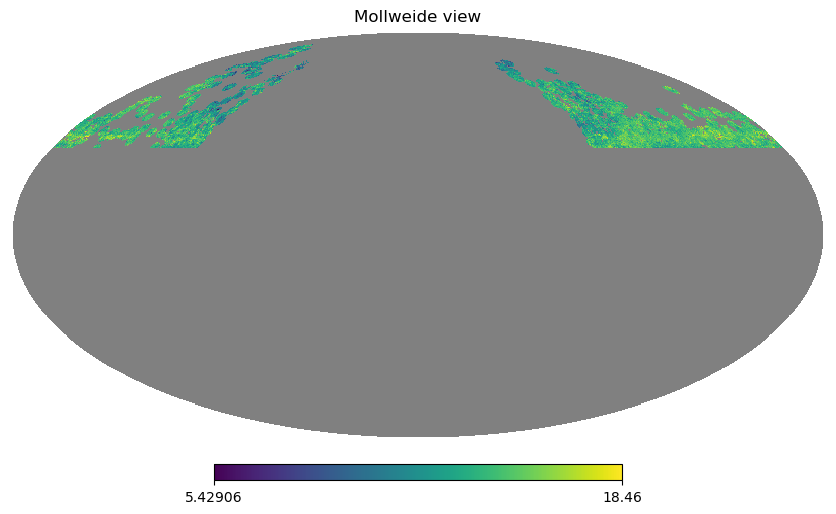

In [3]:
nside = 256
map_  = np.full(12*nside*nside, hp.UNSEEN)
map_[nn['hpix']] = nn['weight'].mean(axis=1)
hp.mollview(map_)

In [4]:
keep = ['RA', 'DEC', 'Z_not4clus', 'PHOTSYS', 'FRACZ_TILELOCID', 'WEIGHT_ZFAIL', 'WEIGHT_SYS','ZWARN', 'o2c','FRAC_TLOBS_TILES']
dfn = f"/global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v0.6/ELG_LOPnotqso_full.dat.fits"
d = Table(fitsio.read(dfn,column=keep))

/tmp/ipykernel_2031104/1026108957.py:3: DeprecationWarning: The keyword arguments '{'column': ['RA', 'DEC', 'Z_not4clus', 'PHOTSYS', 'FRACZ_TILELOCID', 'WEIGHT_ZFAIL', 'WEIGHT_SYS', 'ZWARN', 'o2c', 'FRAC_TLOBS_TILES']}' are being ignored! This warning will be an error in a future version of `fitsio`!
  d = Table(fitsio.read(dfn,column=keep))


In [7]:
hpix = radec2hpix(nside,d['RA'],d['DEC'])

In [9]:
hpix

522814
523837
523837
523837
522814
522814
522814
522814
522814
522814
522814
